# Flight Price Prediction

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing datasets
traindata = pd.read_excel("C:\\Users\\Asus\\jupdoc\\flight\\dataTrain.xlsx")
testdata = pd.read_excel("C:\\Users\\Asus\\jupdoc\\flight\\testSet.xlsx")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
traindata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
traindata['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
3h 25m       1
4h 10m       1
28h 30m      1
29h 10m      1
35h 35m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
traindata.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
traindata.dropna(inplace=True)

In [9]:
traindata.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA Exploratory Data Analysis

### Feature Engineering

In [10]:
traindata['Journay_Date'] = pd.to_datetime(traindata.Date_of_Journey,format = '%d/%m/%Y').dt.day

In [11]:
traindata['Journay_month'] = pd.to_datetime(traindata['Date_of_Journey'],format = '%d/%m/%Y').dt.month

In [12]:
traindata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journay_Date,Journay_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
traindata.drop(['Date_of_Journey'],axis = 1,inplace=True)

In [14]:
#Departure time is when a plane leaves
#extracting hours
traindata['Dep_hour'] = pd.to_datetime(traindata['Dep_Time']).dt.hour

#extracting minutes
traindata['Dep_min'] = pd.to_datetime(traindata['Dep_Time']).dt.minute

#now we can drop Dep_time as it is of no use 
traindata.drop(['Dep_Time'],axis = 1, inplace= True)

In [15]:
traindata.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journay_Date,Journay_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
#Arrival time is when a plane arrives
#extracting hours
traindata['Arrival_hour'] = pd.to_datetime(traindata.Arrival_Time).dt.hour

#extracting minutes
traindata['Arrival_min'] = pd.to_datetime(traindata.Arrival_Time).dt.minute

#now we can drop Dep_time as it is of no use 
traindata.drop(['Arrival_Time'],axis = 1, inplace= True)

In [17]:
traindata.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journay_Date,Journay_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# Time taken by plane to reach destination
# It is the difference between departure time and arrival time 

#Assigning and converting duration column into list 
duration = list(traindata['Duration'])

for i in range(len(duration)):
    if(len(duration[i].split()) != 2): #check if duration contains only hour or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m' #adds 0 minute
        else:
            duration[i] = '0h ' + duration[i] #adds 0 hour

duration_hours= []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) #extract hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) #extracts only minutes from duration

In [19]:
#adding duration_hours and duration_mins lest to traindata dataframe
traindata['Duration_hour'] = duration_hours
traindata['Duration_mins'] = duration_mins

In [20]:
traindata.drop(['Duration'],axis = 1,inplace= True)

In [21]:
traindata.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journay_Date,Journay_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data 


1.Nominal data --unordered data -- Eg-OneHotEncoder 

2.Ordinal data --ordered data -- Eg-LabelEncoder 

In [22]:
traindata['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

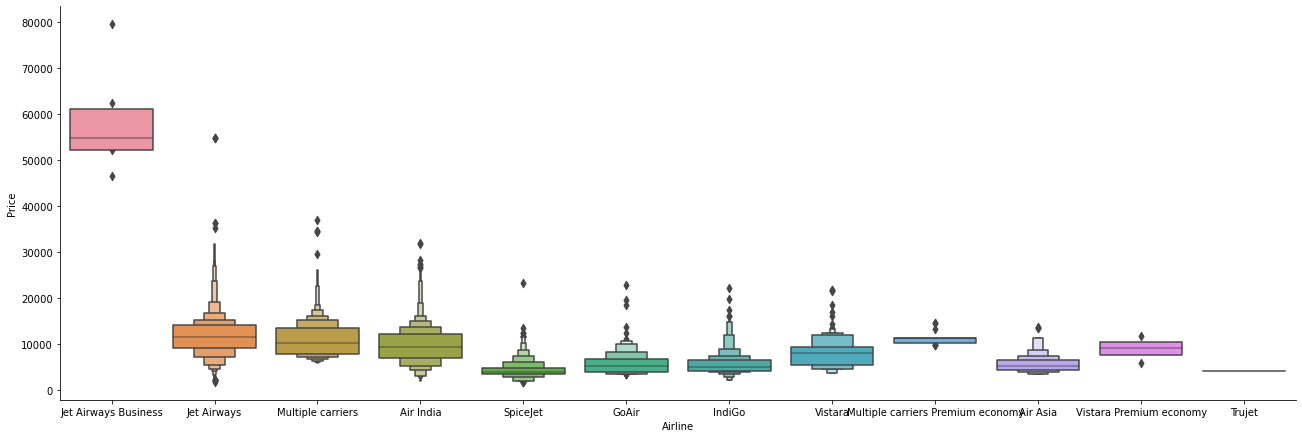

In [23]:
# airline vs price
sns.catplot( y = 'Price',x = 'Airline',data = traindata.sort_values('Price',ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()
# **From the graph we can see that Jet Airways Business have the highest price.

In [24]:
# as airline is nominal categorical data we will perform OneHotEncoding

Airline = traindata[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [25]:
traindata['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

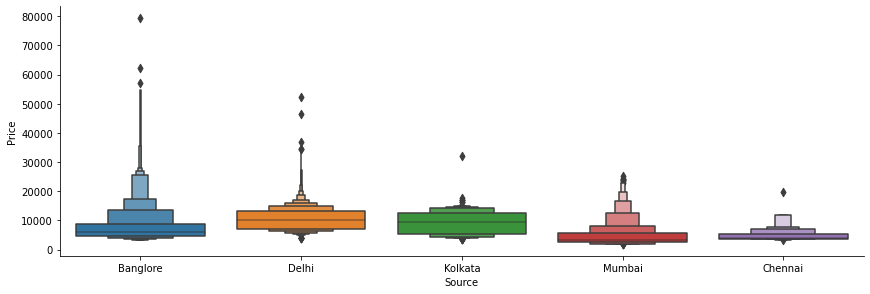

In [26]:
#source vs price 

sns.catplot(x = 'Source', y = 'Price', data = traindata.sort_values('Price',ascending = False),kind = 'boxen', height = 4, aspect = 3)
plt.show()

In [27]:
# As source is nominal categorical data we will perform OneHotEncoding
Source = traindata[['Source']]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


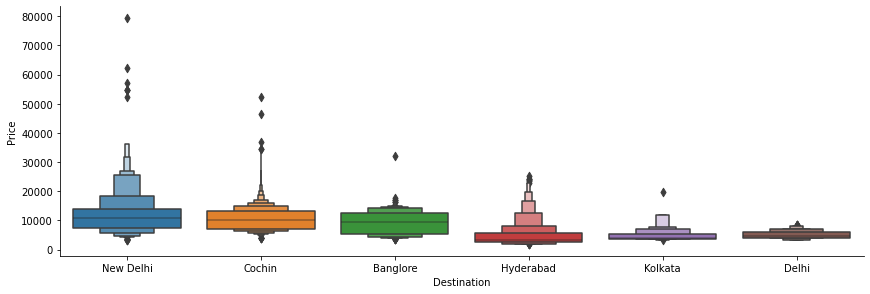

In [28]:
#destination vs price 

sns.catplot(x = 'Destination', y = 'Price', data = traindata.sort_values('Price',ascending = False),kind = 'boxen', height = 4, aspect = 3)
plt.show()

In [29]:
# As destination is nominal categorical data we will perform OneHotEncoding
Destination = traindata[['Destination']]
Destination = pd.get_dummies(Destination, drop_first= True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [30]:
traindata[['Source','Destination']]

,Source,Destination
0,Banglore,New Delhi
1,Kolkata,Banglore
2,Delhi,Cochin
3,Kolkata,Banglore
4,Banglore,New Delhi
...,...,...
10678,Kolkata,Banglore
10679,Kolkata,Banglore
10680,Banglore,Delhi
10681,Banglore,New Delhi


In [31]:
traindata['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [32]:
traindata['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [33]:
# Additional_Info contains no_info in most 
# Route and total_stops are related to each other 

traindata.drop(['Route','Additional_Info'], axis = 1, inplace = True)


In [34]:
traindata['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
# As this is case of ordinal categorical type we will perform LabelEncoder
# Here values are assigned with corresponding keys

traindata.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace = True)
traindata.head()

,Airline,Source,Destination,Total_Stops,Price,Journay_Date,Journay_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [36]:
# Concatinate dataframe --> traindata + Airline + Source + Destination
traindata = pd.concat([traindata,Airline,Source,Destination], axis = 1)
traindata.head()

,Airline,Source,Destination,Total_Stops,Price,Journay_Date,Journay_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
traindata.drop(['Airline','Source','Destination'], axis = 1, inplace = True)
traindata.head()

,Total_Stops,Price,Journay_Date,Journay_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
traindata.shape

(10682, 30)

In [39]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journay_Date                               10682 non-null  int64
 3   Journay_month                              10682 non-null  int64
 4   Dep_hour                                   10682 non-null  int64
 5   Dep_min                                    10682 non-null  int64
 6   Arrival_hour                               10682 non-null  int64
 7   Arrival_min                                10682 non-null  int64
 8   Duration_hour                              10682 non-null  int64
 9   Duration_mins                              10682 non-null  int64
 10  Airline_Air India                          106

## Test Set

Repeating same process for test set

In [40]:
testdata = pd.read_excel("C:\\Users\\Asus\\jupdoc\\flight\\testSet.xlsx")

In [41]:
testdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [42]:
#Preprocessing

print('test data info')
print('-'*75)
print(testdata.info())

print('\n\n')

print('null values:')
print('-'*75)
testdata.dropna(inplace=True)
print(testdata.isnull().sum())
testdata

test data info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None



null values:
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [43]:

#EDA

# Date_of_Journey 
testdata["Journey_day"] = pd.to_datetime(testdata.Date_of_Journey, format="%d/%m/%Y").dt.day 
testdata["Journey_month"] = pd.to_datetime(testdata["Date_of_Journey"], format = "%d/%m/%Y").dt.month 
testdata.drop( ["Date_of_Journey"], axis = 1, inplace = True)

# Dep Time 
testdata["Dep_hour"] = pd.to_datetime(testdata["Dep_Time"]).dt.hour 
testdata["Dep_min"] = pd.to_datetime(testdata["Dep_Time"]).dt.minute 
testdata.drop (["Dep_Time"], axis = 1, inplace = True)

#Arrival time is when a plane arrives
testdata['Arrival_hour'] = pd.to_datetime(testdata.Arrival_Time).dt.hour
testdata['Arrival_min'] = pd.to_datetime(testdata.Arrival_Time).dt.minute
testdata.drop(['Arrival_Time'],axis = 1, inplace= True)

# Time taken by plane to reach destination
# It is the difference between departure time and arrival time 
#Assigning and converting duration column into list 
duration = list(testdata['Duration'])

for i in range(len(duration)):
    if(len(duration[i].split()) != 2): #check if duration contains only hour or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m' #adds 0 minute
        else:
            duration[i] = '0h ' + duration[i] #adds 0 hour

duration_hours= []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) #extract hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) #extracts only minutes from duration

#adding duration_hours and duration_mins lest to traindata dataframe
testdata['Duration_hour'] = duration_hours
testdata['Duration_mins'] = duration_mins

testdata.drop(['Duration'],axis = 1,inplace= True)

# as airline is nominal categorical data we will perform OneHotEncoding
Airline = testdata[['Airline']]
Airline = pd.get_dummies(Airline, drop_first = True)


# As source is nominal categorical data we will perform OneHotEncoding
Source = testdata[['Source']]
Source = pd.get_dummies(Source, drop_first= True)


# As destination is nominal categorical data we will perform OneHotEncoding
Destination = testdata[['Destination']]
Destination = pd.get_dummies(Destination, drop_first= True)


# Additional_Info contains no_info in most 
# Route and total_stops are related to each other 
testdata.drop(['Route','Additional_Info'], axis = 1, inplace = True)

# As this is case of ordinal categorical type we will perform LabelEncoder
# Here values are assigned with corresponding keys
testdata.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace = True)


# Concatinate dataframe --> traindata + Airline + Source + Destination
testdata = pd.concat([testdata,Airline,Source,Destination], axis = 1)

testdata.drop(['Airline','Source','Destination'], axis = 1, inplace = True)
testdata.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
testdata.shape

(2671, 28)

## Feature Selection 

Finding out the best faeture which will contribute and have good relation with target variable. Following are some of the feature selection methods:


1.heatmap

2.feature_importance_

3.SelectKBest

In [45]:
traindata.shape

(10682, 30)

In [46]:
traindata.columns


Index(['Total_Stops', 'Price', 'Journay_Date', 'Journay_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [47]:
traindata1 = traindata.loc[:, ['Total_Stops', 'Price', 'Journay_Date', 'Journay_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

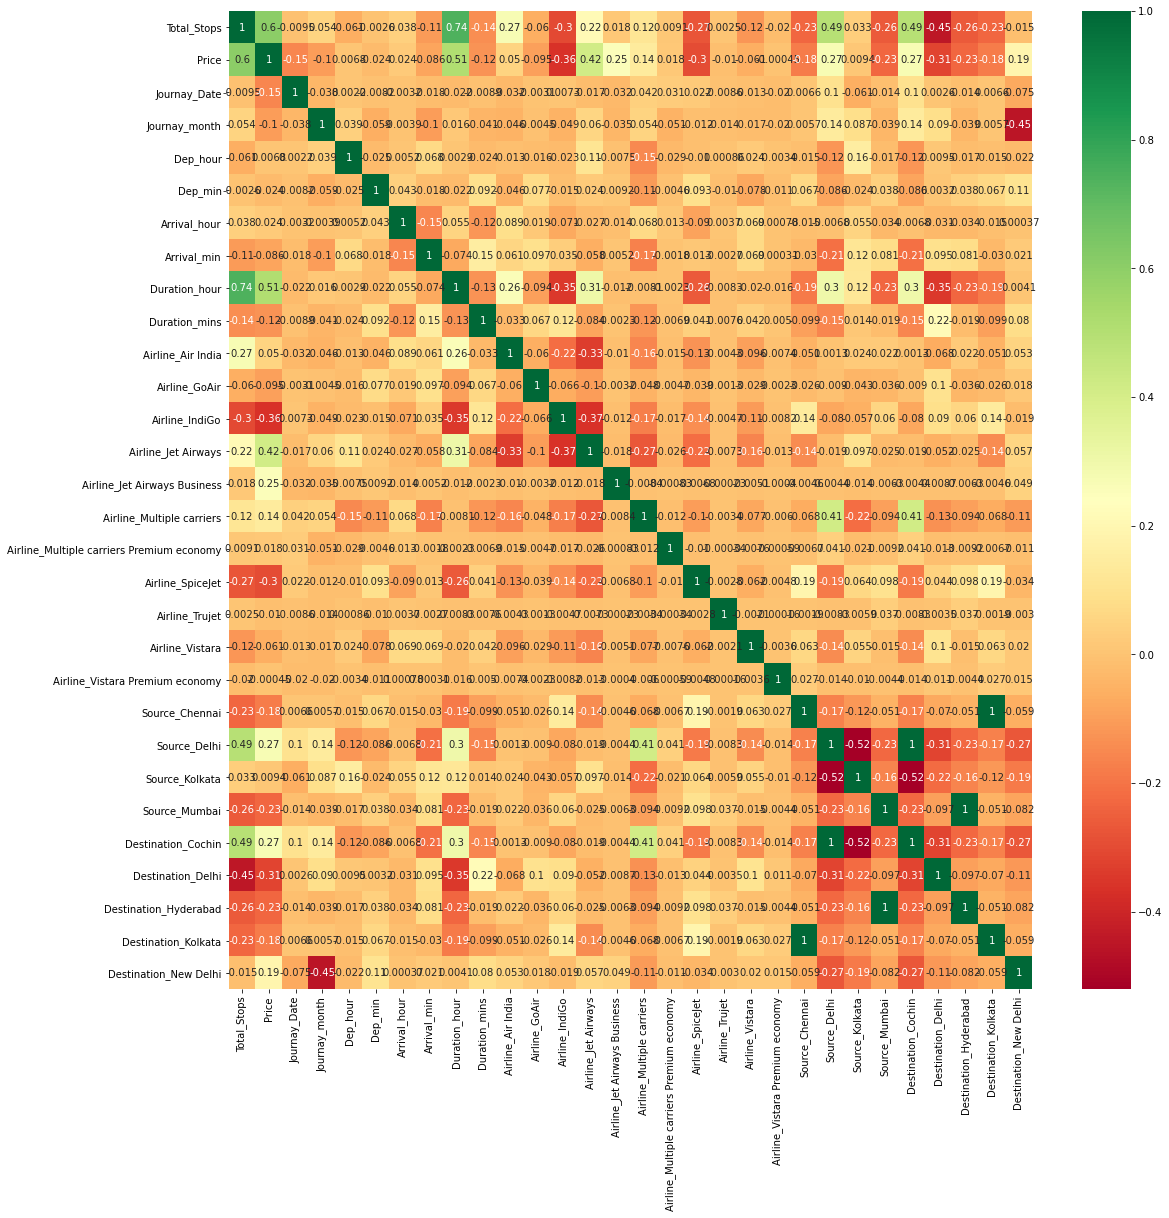

In [48]:
#find correlation between independent and dependent attributes
plt.figure(figsize=(18,18))
sns.heatmap(traindata1.corr(),annot = True,cmap = 'RdYlGn')
plt.show()

In [49]:
x = traindata.loc[:, ['Total_Stops', 'Journay_Date', 'Journay_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journay_Date,Journay_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
y = traindata.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [51]:
# Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [52]:
print(selection.feature_importances_)

[2.42223008e-01 1.42737028e-01 5.41556225e-02 2.44267540e-02
 2.16226284e-02 2.68981756e-02 1.97645656e-02 1.16945163e-01
 1.74502591e-02 8.87908326e-03 1.76883957e-03 1.81462184e-02
 1.35447013e-01 6.81808052e-02 1.95492970e-02 8.75439312e-04
 2.88226452e-03 4.85761310e-03 7.77579955e-05 4.33602872e-04
 8.07593438e-03 3.37921496e-03 4.35081176e-03 1.17808202e-02
 1.18340098e-02 8.01027447e-03 4.63617031e-04 2.47841787e-02]


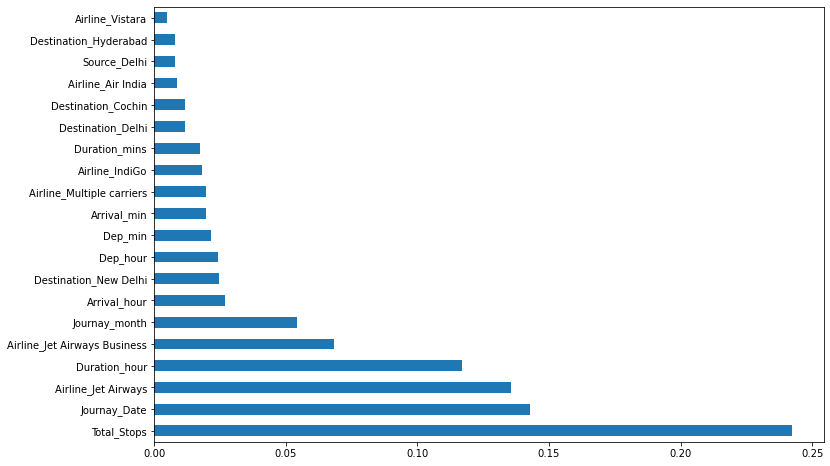

In [53]:
#graph of feature importances for better visualization

plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index = x.columns)
feat_importances.nlargest(20).plot(kind = 'barh')
plt.show()

## Fitting model using Random Forest 

In [54]:
#split train & test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [55]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)


RandomForestRegressor()

In [56]:
# x_test = testdata.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
#        'Arrival_hour', 'Arrival_min', 'Duration_hour', 'Duration_mins',
#        'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
#        'Airline_Jet Airways', 'Airline_Jet Airways Business',
#        'Airline_Multiple carriers',
#        'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
#        'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
#        'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
#        'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
#        'Destination_New Delhi']]

In [57]:
y_pred = reg_rf.predict(x_test)

In [58]:
reg_rf.score(x_train,y_train)

0.953421286630122

In [59]:
reg_rf.score(x_test,y_test)

0.7980769086336182

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


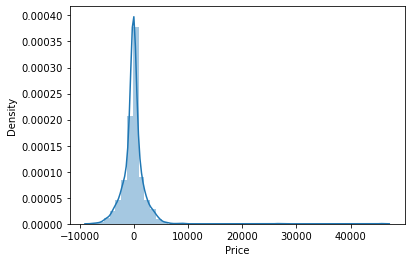

In [60]:
sns.distplot(y_test-y_pred)
plt.show()

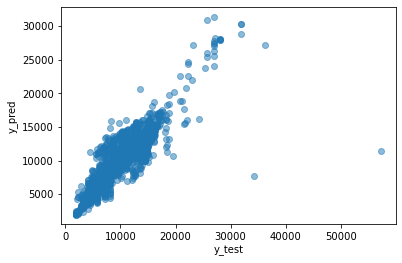

In [61]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [62]:
from sklearn import metrics

In [63]:
print('MAE/Mean Absolute Error:    ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE/Mean Squared Error:     ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE/Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MAE/Mean Absolute Error:     1178.7431938841587
MSE/Mean Squared Error:      4353877.06919079
RMSE/Root Mean Square Error: 2086.5946106493207


In [64]:
# RSME/(max(DV)-min(DV))
2088.8543/(max(y)-min(y))

0.02686525664604581

In [65]:
metrics.r2_score(y_test,y_pred)

0.7980769086336182

## Hyperparameter Tuning

- Choose folling method for hyperparameter tuning
    1. __RandomizedSearchCV__ --> Fast
    2. __GridSearchCV__
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best parameters and best score

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
# Randomized Search CV

#number of trees in random forest 
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200, num = 12)]
#number of features to consider at every split
max_features = ['auto','sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
#minimum number of samples required at each leaf node
min_samples_split = [2,5,10,15,100]
#minimum number of sampples required at each lead node 
min_samples_leaf = [1,2,5,10]

In [68]:
# create the random grid 

random_grid = {'n_estimators':n_estimators,'max_features':max_features,
               'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [69]:
# random search of parameters, using 5 fold cross validation
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 30, cv = 5,verbose=2, random_state=42, n_jobs = 1)

In [70]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.2s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   3.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_featu

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [81]:
prediction = rf_random.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


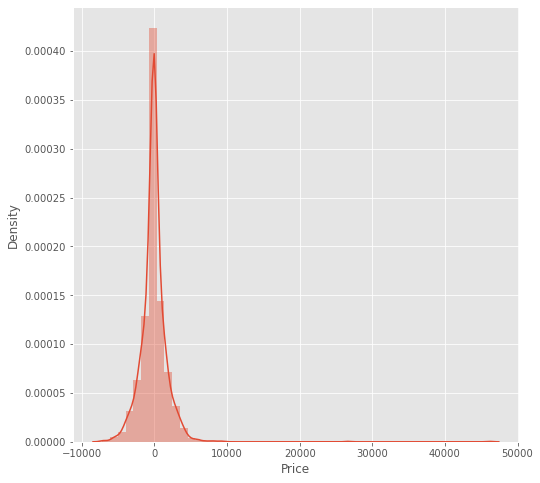

In [85]:
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

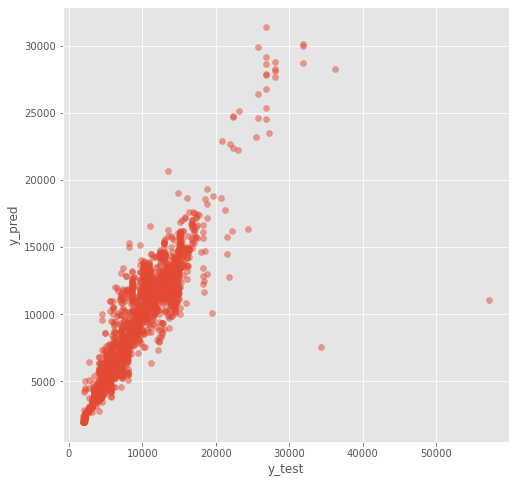

In [86]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [75]:
print('MAE/Mean Absolute Error:    ',metrics.mean_absolute_error(y_test,prediction))
print('MSE/Mean Squared Error:     ',metrics.mean_squared_error(y_test,prediction))
print('RMSE/Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE/Mean Absolute Error:     1138.6527590962685
MSE/Mean Squared Error:      4065049.533809294
RMSE/Root Mean Square Error: 2016.1967993748265


In [88]:
# saving the model for re-use in future
import joblib
joblib.dump(rf_random, 'rf_random.pkl')

['rf_random.pkl']

In [89]:
#saving predicted values in csv file
predictionText = pd.DataFrame(prediction, columns=['prediction']).to_csv('prediction.csv')